<a href="https://colab.research.google.com/github/shyney7/colabAI-lec-py/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the example from lecture 3 Support Vector Machines solved with Python**

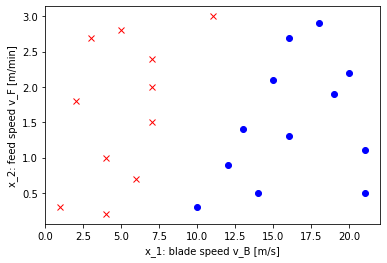

In [ ]:
!pip install qpsolvers
import numpy as np
from qpsolvers import solve_qp, sparse_solvers
import pandas as pd
import matplotlib.pyplot as plt

# import data from xls file
Mpd = pd.read_excel('rawdata.xls')
# transform to numpy array
M = Mpd.to_numpy()

# extract X and Y values
X = M[:,:2]
Y = M[:, 2]

# input- and datasize variables
n = np.size(X, 0)
m = np.size(X, 1)

# plot data points
for i in range(n):
  if(Y[i] < 0):
    plt.plot(X[i,0], X[i,1], 'xr')
  else:
    plt.plot(X[i,0], X[i,1], 'ob')
plt.xlabel('x_1: blade speed v_B [m/s]')
plt.ylabel('x_2: feed speed v_F [m/min]')
plt.show()



**Support Vector Machine:**

v:  [ 0.41071429 -0.89285714 -2.83928571]


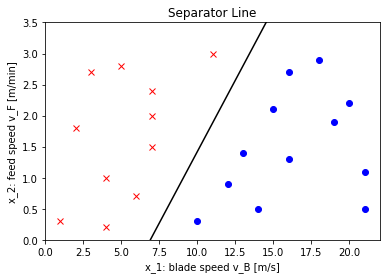

In [ ]:
# create cost function matrix
H = np.zeros((m+1, m+1))
for i in range(np.size(H,0)-1):
  H[i,i] = 1.0

# create cost function vector
f = np.zeros((m+1, 1))

# create contraint matrix A
A = np.zeros((n, m+1))
for i in range(n):
  for j in range(m):
    A[i,j] = -X[i,j]*Y[i]
  A[i,m] = -Y[i]

# create contraint vec. b
b = -np.ones((n,1))

# reshape f & b to fit opt. func. format
f = f.reshape((3,))
b = b.reshape((23,))

# solve QP
v = solve_qp(H,f,A,b, solver=sparse_solvers[0])
print('v: ', v)

# get w and b out of v
w = v[:2]
b1 = v[2]

# create x1 dense values for plotting purposes
x1dense = np.arange(0, 26, 1)

# initialize x2 array
x2dense = np.zeros((np.size(x1dense)))

# calculate x2 values
for i in range(np.size(x1dense)):
  x2dense[i] = -w[0]/w[1]*x1dense[i]-b1/(w[1])

# plot values and separator line
for i in range(n):
  if(Y[i] < 0):
    plt.plot(X[i,0], X[i,1], 'xr')
  else:
    plt.plot(X[i,0], X[i,1], 'ob')
plt.plot(x1dense, x2dense, 'k')
plt.xlim(0, 22)
plt.ylim(0, 3.5)
plt.title('Separator Line')
plt.xlabel('x_1: blade speed v_B [m/s]')
plt.ylabel('x_2: feed speed v_F [m/min]')
plt.show()


**Matlab Code for comparison:**

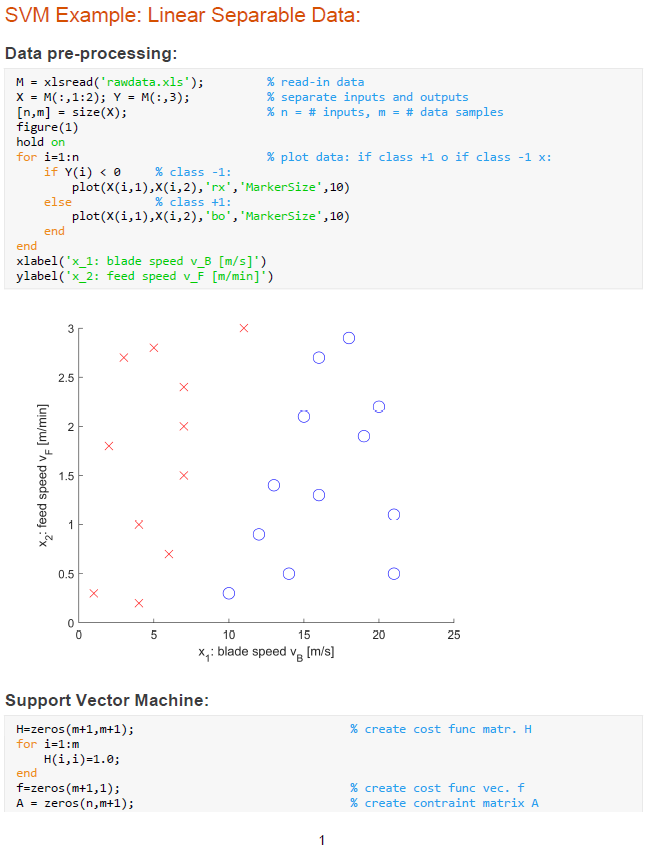
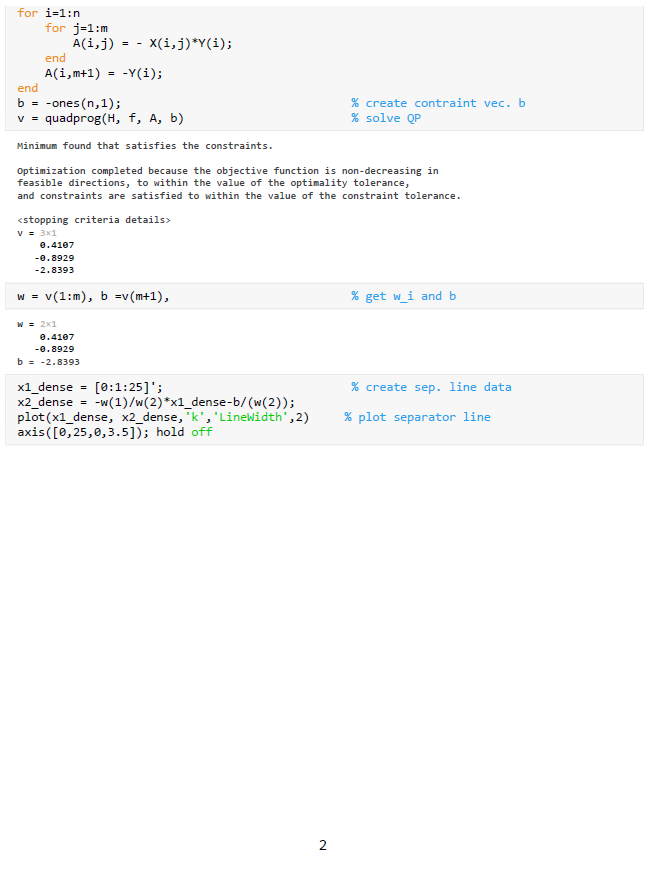
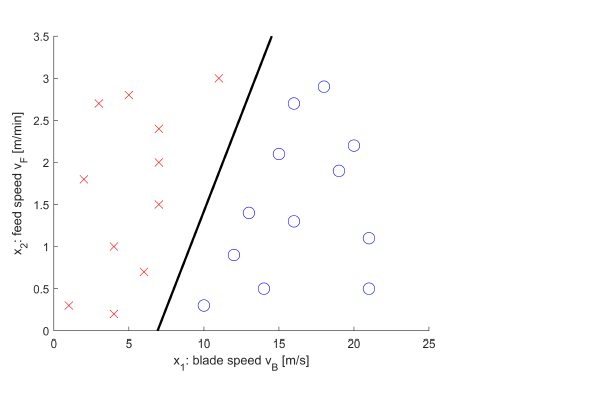